# Import packages and paths

In [2]:
import warnings
warnings.simplefilter(action='ignore')
import scanpy as sc
import anndata
import numpy as np
import gc
import pandas as pd 
import os
from datetime import date
from matplotlib.pyplot import rc_context
pd.set_option('display.max_columns', None)
import torch
import scarches as sca
import gdown
gc.isenabled()

 captum (see https://github.com/pytorch/captum).
INFO:lightning_fabric.utilities.seed:Global seed set to 0


True

In [9]:
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.10


In [4]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [8]:
print(os.path.realpath('expimap.ipynb'))
path_project = '/nfs/research/irene/anaelle/CrossSpeciesIC'
print(path_project)
path_scripts = os.path.join(path_project, 'expiMap')
print(path_scripts)
path_data = os.path.join(path_project, 'data')
print(path_data)
path_data_res = os.path.join(path_scripts, 'expimap_results')
print(path_data_res)
path_models = os.path.join(path_scripts, 'expimap_models')
print(path_models)

/nfs/research/irene/anaelle/CrossSpeciesIC/expiMap/expimap.ipynb
/nfs/research/irene/anaelle/CrossSpeciesIC
/nfs/research/irene/anaelle/CrossSpeciesIC/expiMap
/nfs/research/irene/anaelle/CrossSpeciesIC/data
/nfs/research/irene/anaelle/CrossSpeciesIC/expiMap/expimap_results
/nfs/research/irene/anaelle/CrossSpeciesIC/expiMap/expimap_models


In [ ]:
#!mkdir expimap_results
#!mkdir expimap_models

# Import data

In [ ]:
homolog_human_mouse = sc.read_h5ad(os.path.join(path_data,'all_homolog_human_mouse.h5ad'))

In [128]:
homolog_human_mouse

AnnData object with n_obs × n_vars = 236271 × 16855
    obs: 'sample_name', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'homolog_class_label', 'homolog_subclass_label', 'Unnamed: 0', 'nUMI', 'nGene', 'QC', 'clu

In [129]:
homolog_human_mouse.X

<236271x16855 sparse matrix of type '<class 'numpy.float32'>'
	with 725397500 stored elements in Compressed Sparse Row format>

In [130]:
homolog_human_mouse.layers["raw_counts"] = homolog_human_mouse.X.copy()

In [131]:
homolog_human_mouse

AnnData object with n_obs × n_vars = 236271 × 16855
    obs: 'sample_name', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'homolog_class_label', 'homolog_subclass_label', 'Unnamed: 0', 'nUMI', 'nGene', 'QC', 'clu

In [132]:
homolog_human_mouse.X.max()

2223.0

In [ ]:
#Should not be necessary
#homolog_human_mouse.obs['species'] = np.repeat(['human','mouse'], [76533,159738], axis=0)

In [157]:
mouse_data = homolog_human_mouse[homolog_human_mouse.obs.species == 'mouse']

In [158]:
mouse_data

View of AnnData object with n_obs × n_vars = 159738 × 16855
    obs: 'sample_name', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'homolog_class_label', 'homolog_subclass_label', 'Unnamed: 0', 'nUMI', 'nGene', 'Q

In [136]:
mouse_data.obs

,sample_name,exp_component_name,cluster_label,cluster_color,cluster_order,class_label,class_color,class_order,subclass_label,subclass_color,subclass_order,donor_sex_label,donor_sex_color,donor_sex_order,region_label,region_color,region_order,cortical_layer_label,cortical_layer_color,cortical_layer_order,cell_type_accession_label,cell_type_accession_color,cell_type_accession_order,cell_type_alias_label,cell_type_alias_color,cell_type_alias_order,cell_type_alt_alias_label,cell_type_alt_alias_color,cell_type_alt_alias_order,cell_type_designation_label,cell_type_designation_color,cell_type_designation_order,external_donor_name_label,external_donor_name_color,external_donor_name_order,specimen_type,full_genotype_label,outlier_type,homolog_class_label,homolog_subclass_label,Unnamed: 0,nUMI,nGene,QC,cluster,Allen.cluster_id,Allen.cluster_label,Allen.class_label,Allen.subclass_label,comb.QC,row,BICCN_cluster_id,BICCN_cluster_label,BICCN_class_label,BICCN_subclass_label,size,gene.counts,umi.counts,Broad.QC.doublet,Broad.QC.Mito,Broad.passQC,MALE,Comb.QC,cl,temp_class_label,BICCN_ontology_term_id,assay_ontology_term_id,disease_ontology_term_id,tissue_ontology_term_id,cell_type_ontology_term_id,self_reported_ethnicity_ontology_term_id,development_stage_ontology_term_id,sex_ontology_term_id,organism_ontology_term_id,donor_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,species
pBICCNsMMrMOpRMiF007d190314_AAAGGGCAGGGCTAAC,pBICCNsMMrMOpRMiF007d190314_AAAGGGCAGGGCTAAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Neuronal,Astro,100473.0,4499.0,2094.0,PassQC,Astro_14,91.0,Astro Aqp4_1,Non-Neuronal,Astro,PassQC,4.0,91.0,Astro Aqp4_1,Non-Neuronal,Astro,16143.0,2601.086105,5846.112804,0.03,0.0,0.97,0.448615,NaN,113.0,Non-NeuronalAstro,ILX:0770141,EFO:0009922,PATO:0000461,UBERON:0001384,CL:0000127,na,MmusDv:0000061,PATO:0000383,NCBITaxon:10090,F007,nucleus,astrocyte,10x 3' v3,normal,Mus musculus,female,primary motor cortex,na,early adult stage,mouse
pBICCNsMMrMOpRMiF007d190314_AAAGGTAGTGGCTGAA,pBICCNsMMrMOpRMiF007d190314_AAAGGTAGTGGCTGAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glutamatergic,L2/3 IT,100474.0,11900.0,4182.0,PassQC,Ex2_9,48.0,L2/3 IT_1,Glutamatergic,L2/3 IT,PassQC,5.0,48.0,L2/3 IT_1,Glutamatergic,L2/3 IT,23971.0,5300.903467,19543.896210,0.11,0.0,0.89,0.402945,NaN,64.0,GlutamatergicL2/3 IT,ILX:0770156,EFO:0009922,PATO:0000461,UBERON:0001384,CL:0000679,na,MmusDv:0000061,PATO:0000383,NCBITaxon:10090,F007,nucleus,glutamatergic neuron,10x 3' v3,normal,Mus musculus,female,primary motor cortex,na,early adult stage,mouse
pBICCNsMMrMOpRMiF007d190314_AAAGTCCCAAGAGCTG,pBICCNsMMrMOpRMiF007d190314_AAAGTCCCAAGAGCTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Neuronal,Astro,100475.0,4166.0,2025.0,PassQC,Astro_0,91.0,Astro Aqp4_1,Non-Neuronal,Astro,PassQC,6.0,91.0,Astro Aqp4_1,Non-Neuronal,Astro,16143.0,2601.086105,5846.112804,0.03,0.0,0.97,0.448615,NaN,113.0,Non-NeuronalAstro,ILX:0770141,EFO:0009922,PATO:0000461,UBERON:0001384,CL:0000127,na,MmusDv:0000061,PATO:0000383,NCBITaxon:10090,F007,nucleus,astrocyte,10x 3' v3,normal,Mus musculus,female,primary motor cortex,na,early adult stage,mouse
pBICCNsMMrMOpRMiF007d190314_AAATGGAAGATCACCT,pBICCNsMMrMOpRMiF007d190314_AAATGGAAGATCACCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glutamatergic,L6 CT,100476.0,11834.0,4090.0,PassQC,Ex3_0,66.0,L6 CT Cpa6,Glutamatergic,L6 CT,PassQC,7.0,66.0,L6 CT Cpa6,Glutamatergic,L6 CT,16829.0,4862.752035,15796.942180,0.00,0.0,0.99,0.471210,NaN,104.0,GlutamatergicL6 CT,ILX:0770162,EFO:0009922,PATO:000

In [137]:
mouse_data.var

,human_chromosome,human_long_gene_name,human_gene_name,mouse_ensembl_id,orthology_type,mouse_gene_name,human_entrez_id,human_ensembl_id,mouse_homologs_ids,mouse_homologs_names,human_homologs_ensembl_ids,human_homologs_entrez_ids,human_homologs_names,batch
ENSG00000121410,19,alpha-1-B glycoprotein,A1BG,ENSMUSG00000022347,ortholog_one2one,A1bg,1.0,ENSG00000121410,NaN,NaN,NaN,NaN,NaN,o2o
ENSG00000148584,10,APOBEC1 complementation factor,A1CF,ENSMUSG00000052595,ortholog_one2one,A1cf,29974.0,ENSG00000148584,NaN,NaN,NaN,NaN,NaN,o2o
ENSG00000175899,12,alpha-2-macroglobulin,A2M,ENSMUSG00000030111,ortholog_one2one,A2m,2.0,ENSG00000175899,NaN,NaN,NaN,NaN,NaN,o2o
ENSG00000184389,1,"alpha 1,3-galactosyltransferase 2",A3GALT2,ENSMUSG00000028794,ortholog_one2one,A3galt2,127550.0,ENSG00000184389,NaN,NaN,NaN,NaN,NaN,o2o
ENSG00000128274,22,"alpha 1,4-galactosyltransferase",A4GALT,ENSMUSG00000047878,ortholog_one2one,A4galt,53947.0,ENSG00000128274,NaN,NaN,NaN,NaN,NaN,o2o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143149,1,"aldehyde dehydrogenase 9 family, member A1",ALDH9A1,ENSMUSG00000026687,ortholog_many2many,Aldh9a1,223.0,ENSG00000143149,['ENSMUSG00000026687'],['Aldh9a1'],['ENSG00000143149'],[223.0],['ALDH9A1'],m2m
ENSG00000274736,17,chemokine (C-C motif) ligand 23,CCL23,ENSMUSG00000018927,ortholog_many2many,Ccl6,6368.0,ENSG00000274736,"['ENSMUSG00000018927', 'ENSMUSG00000019122']","['Ccl9', 'Ccl6']","['ENSG00000274736', 'ENSG00000275718']","[6359.0, 6368.0]","['CCL15', 'CCL23']",m2m
ENSG00000212124,12,"taste receptor, type 2, member 19",TAS2R19,ENSMUSG00000053217,ortholog_many2many,Tas2r136,259294.0,ENSG00000212124,"['ENSMUSG00000053217', 'ENSMUSG00000059382']","['Tas2r120', 'Tas2r136']","['ENSG00000212124', 'ENSG00000212126', 'ENSG00...","[259296.0, 259295.0, 259294.0, 259290.0, 25929...","['TAS2R50', 'TAS2R20', 'TAS2R19', 'TAS2R31', '...",m2m
ENSG00000072694,1,"Fc fragment of IgG, low affinity IIb, receptor...",FCGR2B,ENSMUSG00000026656,ortholog_many2many,Fcgr2b,2213.0,ENSG00000072694,"['ENSMUSG00000026656', 'ENSMUSG00000059498']","['Fcgr2b', 'Fcgr3']","['ENSG00000072694', 'ENSG00000143226']","[2213.0, 2212.0]","['FCGR2B', 'FCGR2A']",m2m


In [159]:
mouse_data.var = mouse_data.var.set_index('human_gene_name')
mouse_data.var['human_gene_name'] = mouse_data.var.index

In [139]:
mouse_data.var

,human_chromosome,human_long_gene_name,mouse_ensembl_id,orthology_type,mouse_gene_name,human_entrez_id,human_ensembl_id,mouse_homologs_ids,mouse_homologs_names,human_homologs_ensembl_ids,human_homologs_entrez_ids,human_homologs_names,batch,human_gene_name
human_gene_name,,,,,,,,,,,,,,
A1BG,19,alpha-1-B glycoprotein,ENSMUSG00000022347,ortholog_one2one,A1bg,1.0,ENSG00000121410,NaN,NaN,NaN,NaN,NaN,o2o,A1BG
A1CF,10,APOBEC1 complementation factor,ENSMUSG00000052595,ortholog_one2one,A1cf,29974.0,ENSG00000148584,NaN,NaN,NaN,NaN,NaN,o2o,A1CF
A2M,12,alpha-2-macroglobulin,ENSMUSG00000030111,ortholog_one2one,A2m,2.0,ENSG00000175899,NaN,NaN,NaN,NaN,NaN,o2o,A2M
A3GALT2,1,"alpha 1,3-galactosyltransferase 2",ENSMUSG00000028794,ortholog_one2one,A3galt2,127550.0,ENSG00000184389,NaN,NaN,NaN,NaN,NaN,o2o,A3GALT2
A4GALT,22,"alpha 1,4-galactosyltransferase",ENSMUSG00000047878,ortholog_one2one,A4galt,53947.0,ENSG00000128274,NaN,NaN,NaN,NaN,NaN,o2o,A4GALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ALDH9A1,1,"aldehyde dehydrogenase 9 family, member A1",ENSMUSG00000026687,ortholog_many2many,Aldh9a1,223.0,ENSG00000143149,['ENSMUSG00000026687'],['Aldh9a1'],['ENSG00000143149'],[223.0],['ALDH9A1'],m2m,ALDH9A1
CCL23,17,chemokine (C-C motif) ligand 23,ENSMUSG00000018927,ortholog_many2many,Ccl6,6368.0,ENSG00000274736,"['ENSMUSG00000018927', 'ENSMUSG00000019122']","['Ccl9', 'Ccl6']","['ENSG00000274736', 'ENSG00000275718']","[6359.0, 6368.0]","['CCL15', 'CCL23']",m2m,CCL23
TAS2R19,12,"taste receptor, type 2, member 19",ENSMUSG00000053217,ortholog_many2many,Tas2r136,259294.0,ENSG00000212124,"['ENSMUSG00000053217', 'ENSMUSG00000059382']","['Tas2r120', 'Tas2r136']","['ENSG00000212124', 'ENSG00000212126', 'ENSG00...","[259296.0, 259295.0, 259294.0, 259290.0, 25929...","['TAS2R50', 'TAS2R20', 'TAS2R19', 'TAS2R31', '...",m2m,TAS2R19


In [140]:
mouse_data.obs.species.unique()

array(['mouse'], dtype=object)

In [141]:
homolog_human_mouse.obs

,sample_name,exp_component_name,cluster_label,cluster_color,cluster_order,class_label,class_color,class_order,subclass_label,subclass_color,subclass_order,donor_sex_label,donor_sex_color,donor_sex_order,region_label,region_color,region_order,cortical_layer_label,cortical_layer_color,cortical_layer_order,cell_type_accession_label,cell_type_accession_color,cell_type_accession_order,cell_type_alias_label,cell_type_alias_color,cell_type_alias_order,cell_type_alt_alias_label,cell_type_alt_alias_color,cell_type_alt_alias_order,cell_type_designation_label,cell_type_designation_color,cell_type_designation_order,external_donor_name_label,external_donor_name_color,external_donor_name_order,specimen_type,full_genotype_label,outlier_type,homolog_class_label,homolog_subclass_label,Unnamed: 0,nUMI,nGene,QC,cluster,Allen.cluster_id,Allen.cluster_label,Allen.class_label,Allen.subclass_label,comb.QC,row,BICCN_cluster_id,BICCN_cluster_label,BICCN_class_label,BICCN_subclass_label,size,gene.counts,umi.counts,Broad.QC.doublet,Broad.QC.Mito,Broad.passQC,MALE,Comb.QC,cl,temp_class_label,BICCN_ontology_term_id,assay_ontology_term_id,disease_ontology_term_id,tissue_ontology_term_id,cell_type_ontology_term_id,self_reported_ethnicity_ontology_term_id,development_stage_ontology_term_id,sex_ontology_term_id,organism_ontology_term_id,donor_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,species
0,AAACCCAAGGATTTCC-LKTX_190129_01_A01,AAACCCAAGGATTTCC-21L8TX_180927_001_A01,Inh L1-2 SST CCNJL,#fb8d00,50.0,GABAergic,#FF7373,1.0,Sst,#FF9900,5.0,F,#FF7373,1.0,M1,#FF7373,1.0,all,#FF7373,1.0,CS1912131050,#fb8d00,50.0,Inh L1-2 SST CCNJL,#fb8d00,50.0,NaN,#fb8d00,50.0,Neuron 50,#fb8d00,50.0,H18.30.001,#FF7373,1.0,nucleus,NaN,NaN,GABAergic,Sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human
1,AAACCCAAGTATGGCG-LKTX_190129_01_A01,AAACCCAAGTATGGCG-21L8TX_180927_001_A01,Exc L5-6 FEZF2 IFNG-AS1,#2c815f,116.0,Glutamatergic,#3DCC3D,2.0,L5/6 NP,#3E9E64,12.0,F,#FF7373,1.0,M1,#FF7373,1.0,all,#FF7373,1.0,CS1912131116,#2c815f,116.0,Exc L5-6 FEZF2 IFNG-AS1,#2c815f,116.0,NaN,#2c815f,116.0,Neuron 116,#2c815f,116.0,H18.30.001,#FF7373,1.0,nucleus,NaN,NaN,Glutamatergic,L5/6 NP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human
2,AAACCCACAAAGTGTA-LKTX_190129_01_A01,AAACCCACAAAGTGTA-21L8TX_180927_001_A01,Exc L3-5 RORB LINC01202,#547d7a,87.0,Glutamatergic,#3DCC3D,2.0,L5 IT,#50B2AD,8.0,F,#FF7373,1.0,M1,#FF7373,1.0,all,#FF7373,1.0,CS1912131087,#547d7a,87.0,Exc L3-5 RORB LINC01202,#547d7a,87.0,NaN,#547d7a,87.0,Neuron 87,#547d7a,87.0,H18.30.001,#FF7373,1.0,nucleus,NaN,NaN,Glutamatergic,L5 IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human
3,AAACCCACACTACTTT-LKTX_190129_01_A01,AAACCCACACTACTTT-21L8TX_180927_001_A01,Exc L2 LINC00507 GLRA3,#cecd32,75.0,Glutamatergic,#3DCC3D,2.0,L2/3 IT,#C4EC04,7.0,F,#FF7373,1.0,M1,#FF7373,1.0,all,#FF7373,1.0,CS1912131075,#cecd32,75.0,Exc L2 LINC00507 GLRA3,#cecd32,75.0,NaN,#cecd32,75.0,Neuron 75,#cecd32,75.0,H18.30.001,#FF7373,1.0,nucleus,NaN,NaN,Glutamatergic,L2/3 IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,human
4,AAACCCACAGTGAGCA-LKTX_190129_01_A01,AAACCCACAGTGAGCA-21L8TX_180927_001_A01,Oligo L2-6 OPALIN FTH1P3,#003a28,120.0,Non-Neuronal,#171799,3.0,Oligo,#2E3E39,17.0,F,#FF7373,1.0,M1,#FF7373,1.0,all,#FF7373,1.0,CS1912131120,#003a28,120.0,Oligo L2-6 OPALIN FTH1P3,#003a28,120.0,NaN,#003a28,120.0,Non-neuron 3,#003a28,120.0,H18.30.001,#FF7373,1.0,nucleus,NaN,NaN,Non-Neuronal,Oligo,Na

# Start analyse

## Import reactome and add it to object

In [ ]:
url = 'https://drive.google.com/uc?id=1136LntaVr92G1MphGeMVcmpE0AqcqM6c'
output = 'reactome.gmt'
gdown.download(url, output, quiet=False)

In [160]:
sca.utils.add_annotations(mouse_data, 'reactome.gmt', min_genes=6, clean=True)

In [161]:
mouse_data._inplace_subset_var(mouse_data.varm['I'].sum(1)>0)

In [162]:
mouse_data

AnnData object with n_obs × n_vars = 159738 × 4978
    obs: 'sample_name', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'homolog_class_label', 'homolog_subclass_label', 'Unnamed: 0', 'nUMI', 'nGene', 'QC', 'clus

In [163]:
mouse_data.layers['raw_counts'].max()

2133.0

In [ ]:
mouse_data.varm['I']

## Normalisation & hvg

In [164]:
sc.pp.normalize_total(mouse_data)

In [165]:
sc.pp.log1p(mouse_data)

In [166]:
sc.pp.highly_variable_genes(mouse_data,n_top_genes=2000, batch_key='species',subset=True)

In [171]:
select_terms = mouse_data.varm['I'].sum(0)>2

In [172]:
mouse_data.uns['terms'] = np.array(mouse_data.uns['terms'])[select_terms].tolist()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 528 but corresponding boolean dimension is 663

In [151]:
mouse_data.varm['I'] = mouse_data.varm['I'][:, select_terms]

In [173]:
varmI = mouse_data.varm['I'][:, select_terms]

In [174]:
varmI.shape

(2000, 620)

In [152]:
mouse_data._inplace_subset_var(mouse_data.varm['I'].sum(1)>0)

In [153]:
mouse_data.X = mouse_data.layers["raw_counts"].copy()

In [154]:
mouse_data.X.max()

2133.0

In [155]:
mouse_data.varm['I'].shape

(1995, 445)

In [127]:
mouse_data.var.shape[0]

4978

# ExpiMap Model

## First train

In [ ]:
mouse_data.obs

In [98]:
intr_cvae = sca.models.EXPIMAP(
    adata=mouse_data,
    condition_key='species',
    hidden_layer_sizes=[256, 256, 256],
    recon_loss='nb'
)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1995 256 1
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 412
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  412 0 0 1 1995
	with hard mask.
Last Decoder layer: softmax


In [82]:
ALPHA = 0.7

In [6]:
### The following cells have been run by the expimap.py file

early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss", # val_unweighted_loss
    "threshold": 0,
    "patience": 50,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}
intr_cvae.train(
    n_epochs=400,
    alpha_epoch_anneal=100,
    alpha=ALPHA,
    alpha_kl=0.6,
    weight_decay=0.,
    early_stopping_kwargs=early_stopping_kwargs,
    use_early_stopping=True,
    monitor_only_val=False,
    seed=2020,
    print_stats = True
)

In [ ]:
MEAN = False

In [ ]:
mouse_data.obsm['X_cvae'] = intr_cvae.get_latent(mean=MEAN, only_active=True)

In [ ]:
mouse_data.write_h5ad(os.path.join(path_data_res,'expimap_mouse_'+str(date.today())+'.h5ad'),compression='gzip')

## Second train

In [ ]:
human_data = homolog_human_mouse[homolog_human_mouse.obs.species == 'human']

In [ ]:
human_data = human_data[:,human_data.var.human_gene_name.isin(mouse_data.var_names)]

In [ ]:
human_data.var = human_data.var.set_index('human_gene_name')
human_data.var['human_gene_name'] = human_data.var.index

In [ ]:
human_data

In [ ]:
human_data.uns['terms'] = mouse_data.uns['terms']

In [ ]:
q_intr_cvae = sca.models.EXPIMAP.load_query_data(human_data, intr_cvae)

In [ ]:
q_intr_cvae.train(n_epochs=400, alpha_epoch_anneal=100, weight_decay=0., alpha_kl=0.1, seed=2020, use_early_stopping=True)

In [ ]:
q_intr_cvae.save(os.path.join(path_models, 'homolog_human_mouse'))

In [ ]:
human_mouse = sc.AnnData.concatenate(mouse_data, human_data, batch_key='batch_join', uns_merge='same')

In [ ]:
human_mouse.obsm['X_cvae'] = q_intr_cvae.get_latent(human_mouse.X, human_mouse.obs['species'], mean=MEAN, only_active=True)

In [ ]:
human_mouse.write_h5ad(os.path.join(path_data_res,'expimap_human_mouse_'+str(date.today())+'.h5ad'),compression='gzip')

In [ ]:
### Get the results from the file

# Results

## Results w/ alpha & alpha_kl = 0.6 + GPs threshold = 6

### Mouse training

In [85]:
mdata = sc.read_h5ad(os.path.join(path_data_res,'expimap_mouse_data_2023-06-20.h5ad'))

In [86]:
mdata

AnnData object with n_obs × n_vars = 159738 × 1995
    obs: 'sample_name', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'homolog_class_label', 'homolog_subclass_label', 'Unnamed: 0', 'nUMI', 'nGene', 'QC', 'clus

In [87]:
sc.pp.neighbors(mdata, use_rep = 'X_cvae')

In [88]:
sc.tl.umap(mdata)

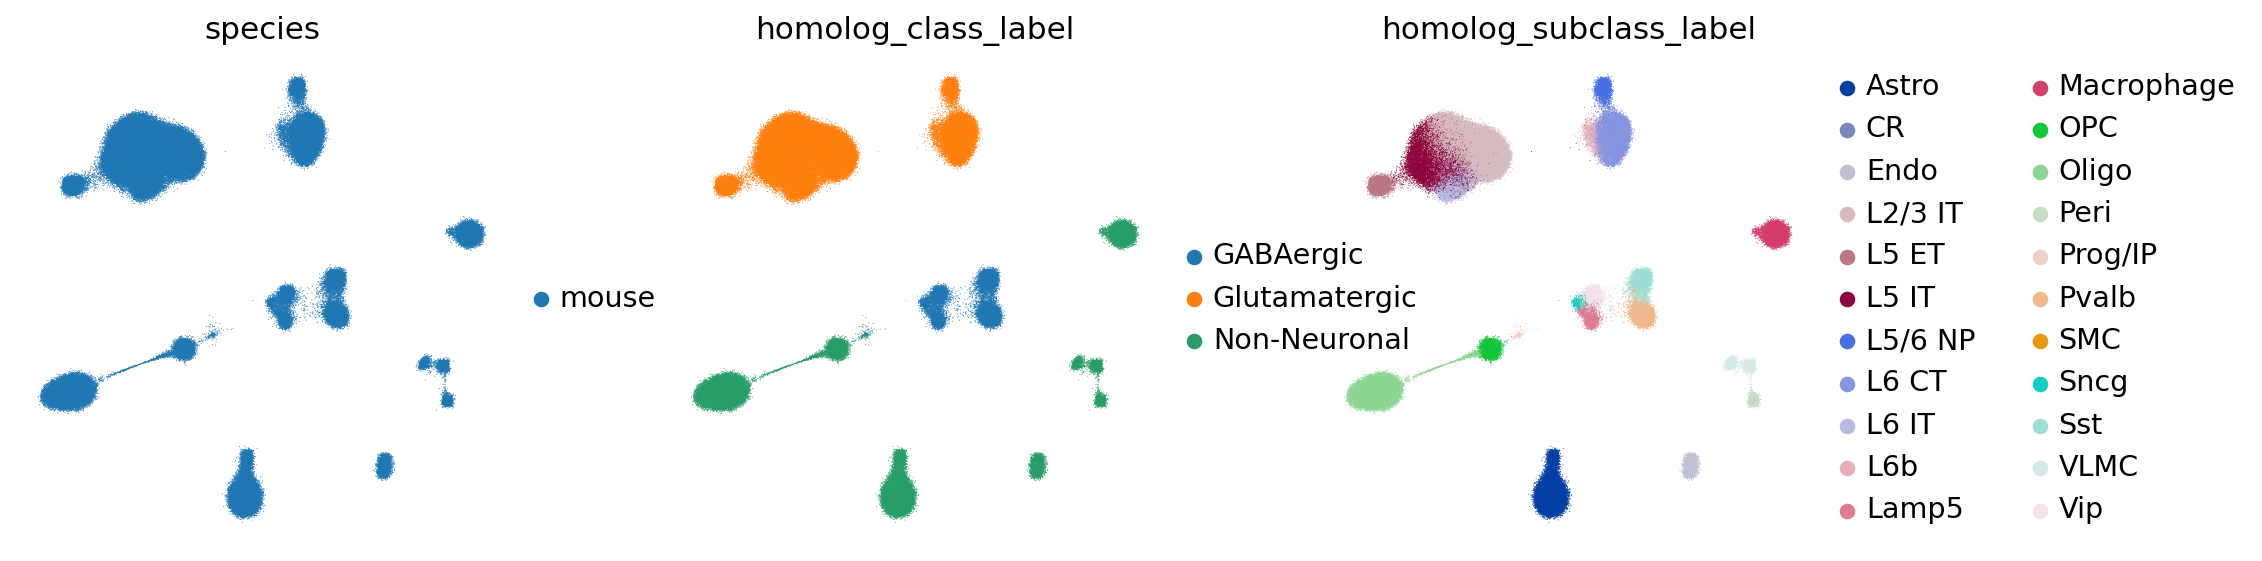

In [89]:
sc.pl.umap(mdata, color = ['species', 'homolog_class_label', 'homolog_subclass_label'], frameon = False)

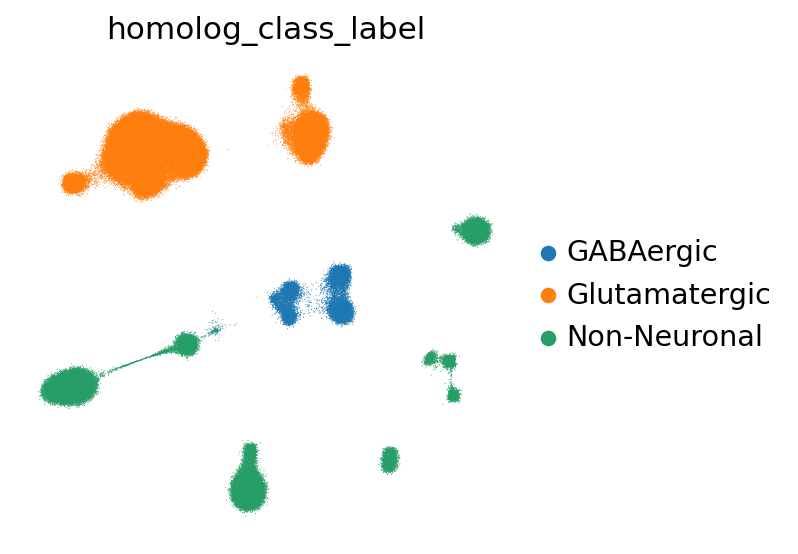

In [178]:
sc.pl.umap(mdata, color = ['homolog_class_label'], frameon = False)

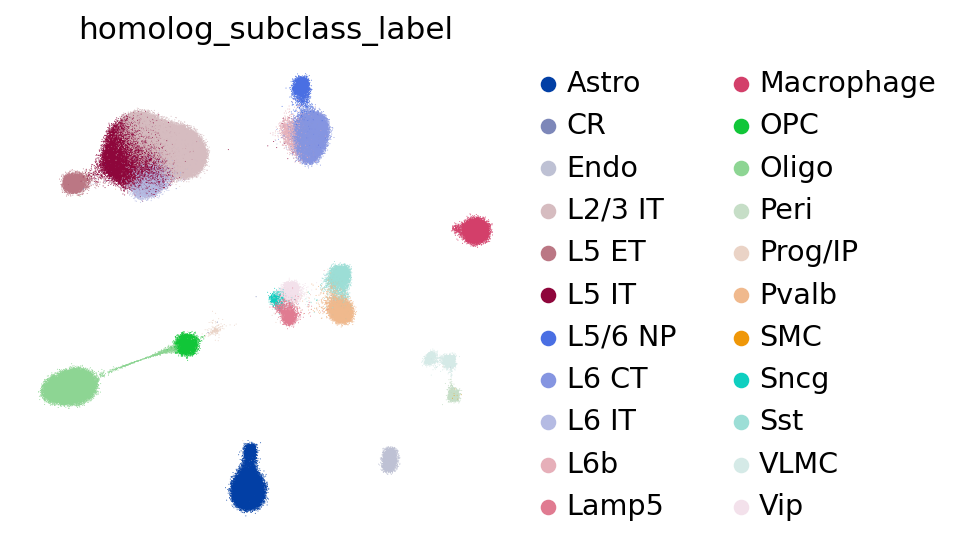

In [179]:
sc.pl.umap(mdata, color = ['homolog_subclass_label'], frameon = False)

### Final training

In [90]:
rdata = sc.read_h5ad(os.path.join(path_data_res,'expimap_human_mouse_2023-06-20.h5ad'))

In [91]:
rdata

AnnData object with n_obs × n_vars = 236271 × 1995
    obs: 'sample_name', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'homolog_class_label', 'homolog_subclass_label', 'Unnamed: 0', 'nUMI', 'nGene', 'QC', 'clus

In [92]:
sc.pp.neighbors(rdata, use_rep = 'X_cvae')

In [93]:
sc.tl.umap(rdata)

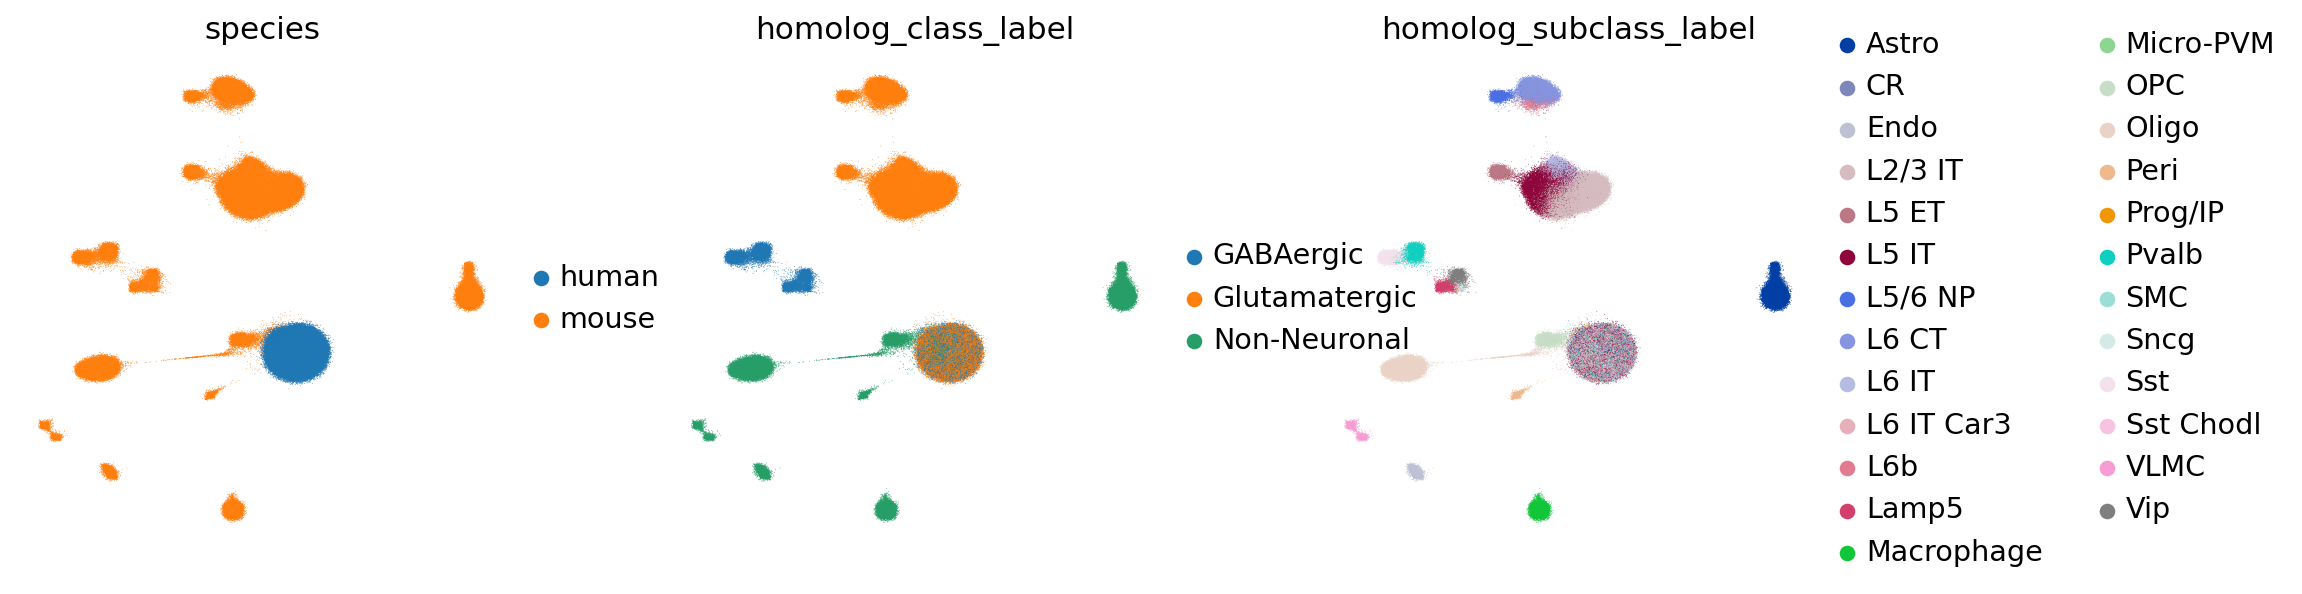

In [95]:
sc.pl.umap(rdata, color = ['species', 'homolog_class_label', 'homolog_subclass_label'], frameon = False)

## Results w/ alpha = 0.7 & alpha_kl = 0.6 & GPs threshold = 6 & 2nd train epoch 500 & 120 + alpha_kl = 0.08

### Mouse training

In [100]:
mdata2 = sc.read_h5ad(os.path.join(path_data_res,'expimap_mouse_data_2023-06-21.h5ad'))

In [101]:
mdata2

AnnData object with n_obs × n_vars = 159738 × 1995
    obs: 'sample_name', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'homolog_class_label', 'homolog_subclass_label', 'Unnamed: 0', 'nUMI', 'nGene', 'QC', 'clus

In [102]:
sc.pp.neighbors(mdata2, use_rep = 'X_cvae')

In [103]:
sc.tl.umap(mdata2)

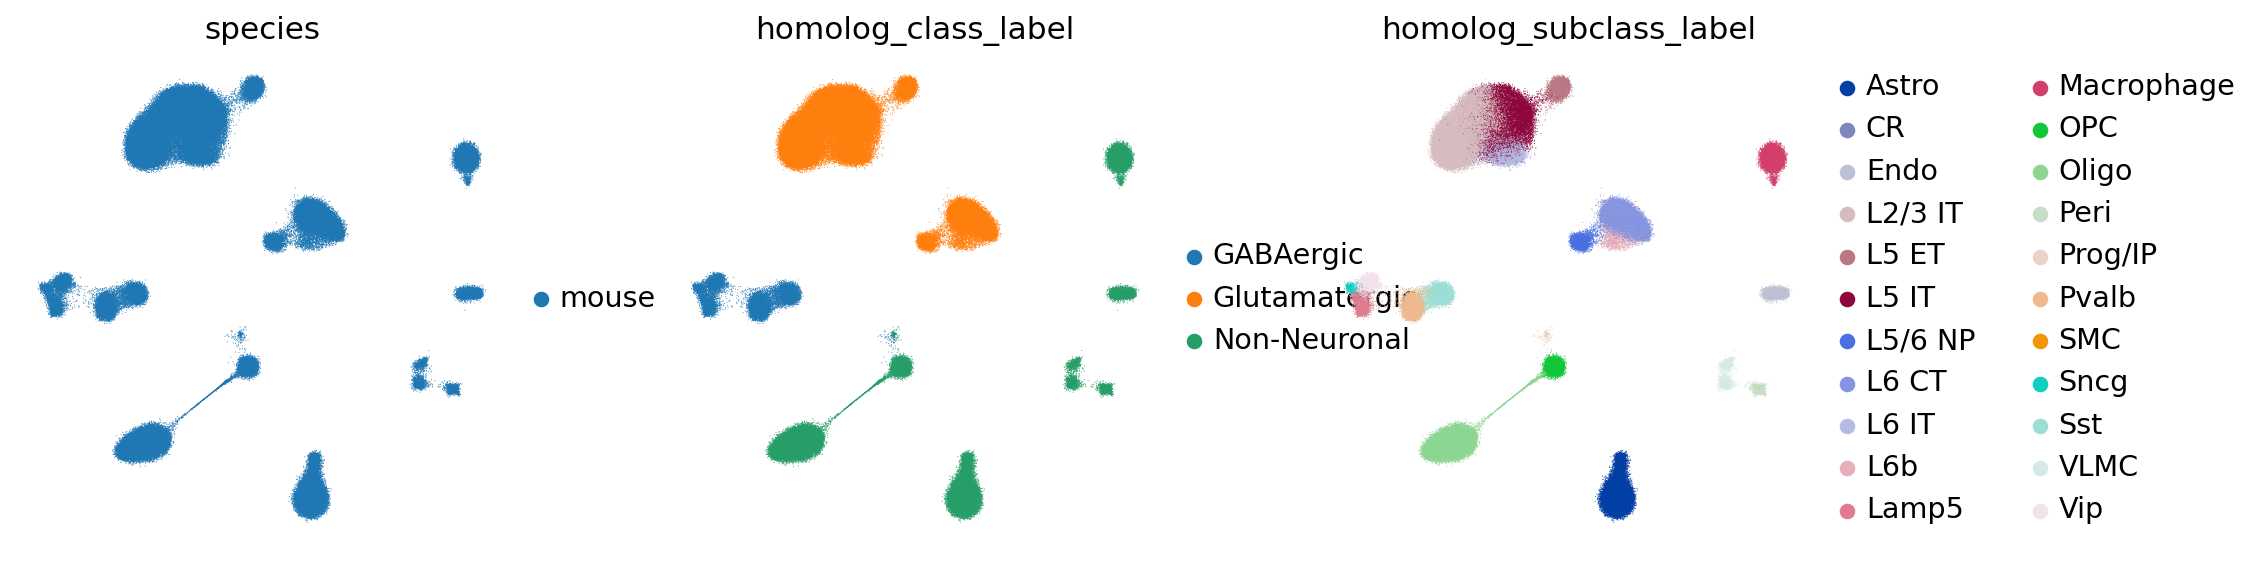

In [104]:
sc.pl.umap(mdata2, color = ['species', 'homolog_class_label', 'homolog_subclass_label'], frameon = False)

### Final training

In [105]:
rdata2 = sc.read_h5ad(os.path.join(path_data_res,'expimap_human_mouse_2023-06-21.h5ad'))

In [106]:
rdata2

AnnData object with n_obs × n_vars = 236271 × 1995
    obs: 'sample_name', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order', 'class_label', 'class_color', 'class_order', 'subclass_label', 'subclass_color', 'subclass_order', 'donor_sex_label', 'donor_sex_color', 'donor_sex_order', 'region_label', 'region_color', 'region_order', 'cortical_layer_label', 'cortical_layer_color', 'cortical_layer_order', 'cell_type_accession_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_alias_label', 'cell_type_alias_color', 'cell_type_alias_order', 'cell_type_alt_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_designation_label', 'cell_type_designation_color', 'cell_type_designation_order', 'external_donor_name_label', 'external_donor_name_color', 'external_donor_name_order', 'specimen_type', 'full_genotype_label', 'outlier_type', 'homolog_class_label', 'homolog_subclass_label', 'Unnamed: 0', 'nUMI', 'nGene', 'QC', 'clus

In [107]:
sc.pp.neighbors(rdata2, use_rep = 'X_cvae')

In [108]:
sc.tl.umap(rdata2)

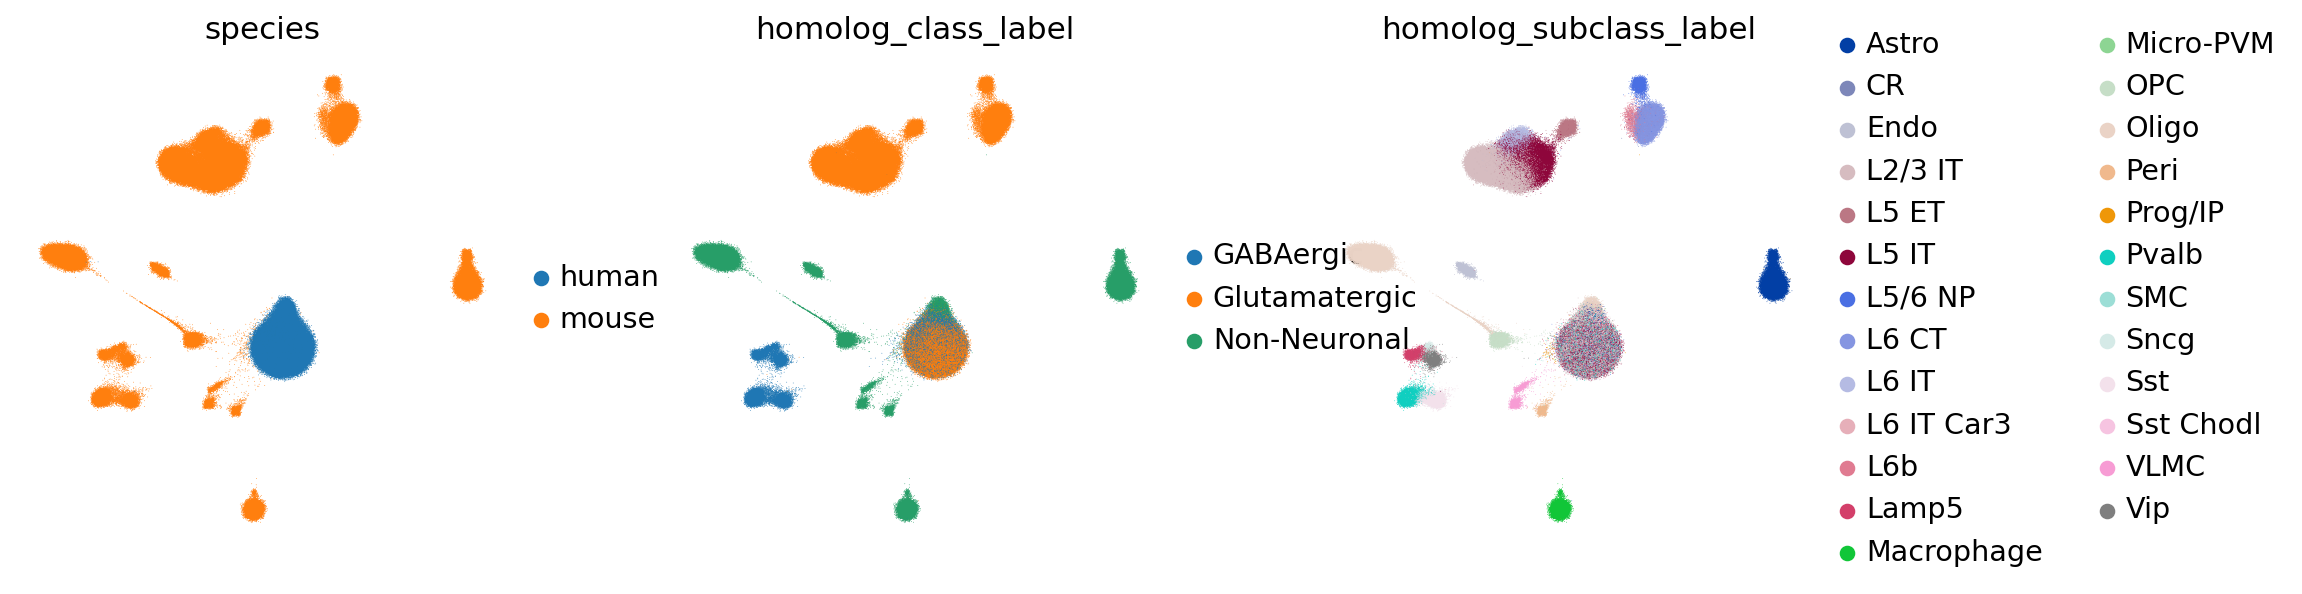

In [109]:
sc.pl.umap(rdata2, color = ['species', 'homolog_class_label', 'homolog_subclass_label'], frameon = False)